### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [64]:
data = pd.read_csv('data/coupons.csv')

In [65]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [66]:
#show count of missing values per column
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [67]:
#Preserve the feature just in case respondents intentionally did not answer if they have a car or not.
data['car'] = data['car'].fillna('Unknown')

#I assigned a neutral baseline that could be tested for correlation with coupon behavior. The missing values represent how often the respondent visit the venue, skipping the question doesn't mean they don't visit the place.
visit_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[visit_columns] = data[visit_columns].fillna('Never')

#Check if missing values still exist
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [68]:
#Get the proportion of users who accepted the coupon

accepted_proportion = data['Y'].mean()
print(f"Proportion of users who accepted the coupon: {accepted_proportion:.2%}")


Proportion of users who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

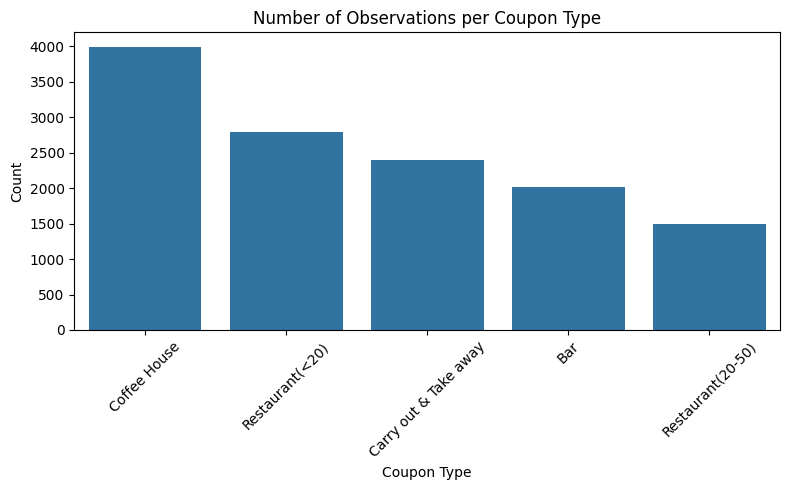

In [69]:
#Bar Plot for the coupon column
plt.figure(figsize=(8, 5))
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index)
plt.title("Number of Observations per Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
# Save the image
plt.savefig('images/coupon_barplot.png', dpi=300)

plt.show()


6. Use a histogram to visualize the temperature column.

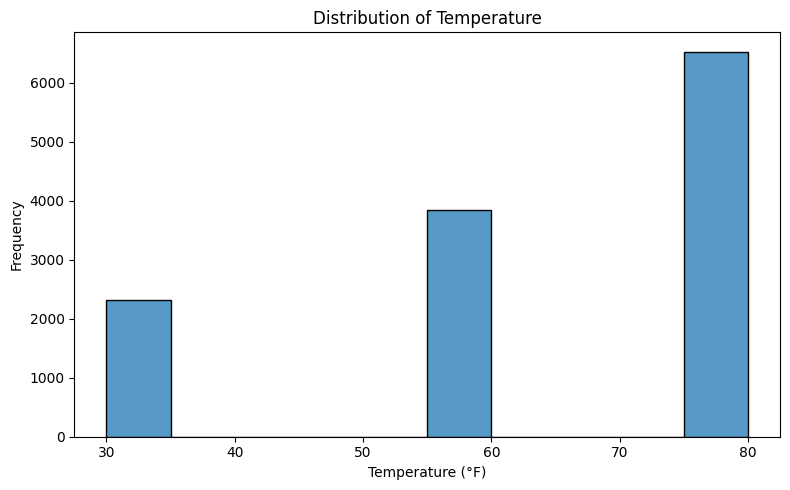

In [70]:
#Histogram for temperature column
plt.figure(figsize=(8, 5))
sns.histplot(data['temperature'], bins=10, kde=False)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('images/temp_hist.png', dpi=300)
plt.show()

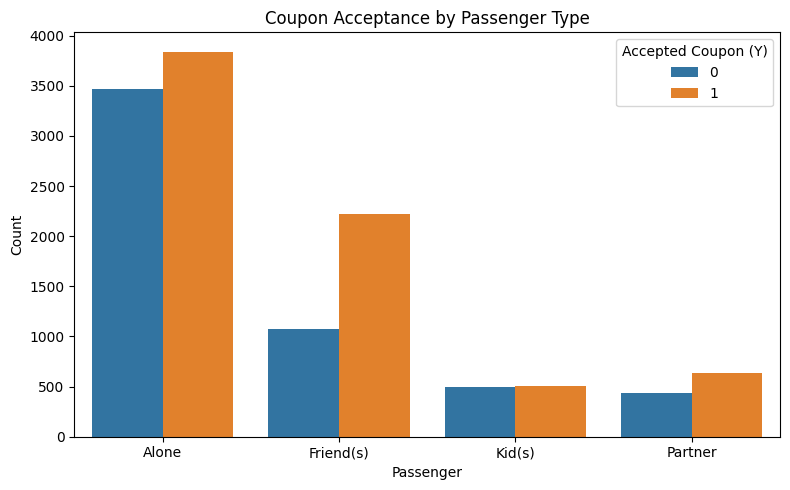

In [71]:
#Grouped bar plot that show passenger vs. coupon acceptance
plt.figure(figsize=(8, 5))
sns.countplot(x='passanger', hue='Y', data=data)
plt.title("Coupon Acceptance by Passenger Type")
plt.xlabel("Passenger")
plt.ylabel("Count")
plt.legend(title='Accepted Coupon (Y)')
plt.tight_layout()
plt.savefig('images/groupedbar_passengers.png', dpi=300)
plt.show()


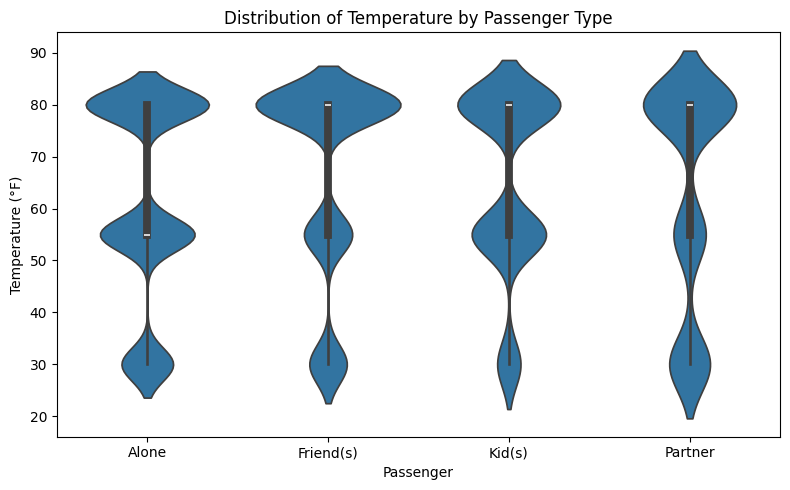

In [72]:
#Just for fun, I want to use the Violin Plot for the temperature vs. passenger column


plt.figure(figsize=(8, 5))
sns.violinplot(x='passanger', y='temperature', data=data)
plt.title("Distribution of Temperature by Passenger Type")
plt.xlabel("Passenger")
plt.ylabel("Temperature (°F)")
plt.tight_layout()
plt.savefig('images/violin_temp_vs_passenger.png', dpi=300)
plt.show()


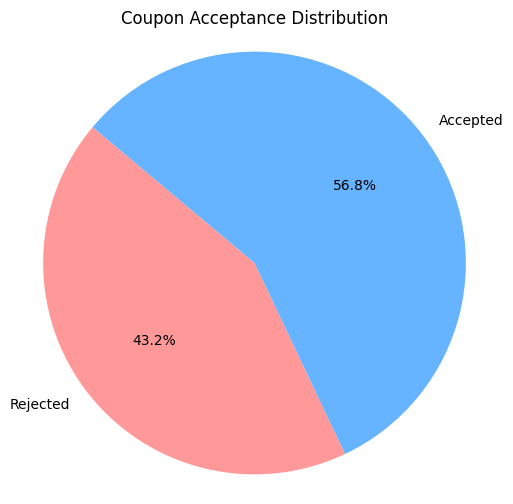

In [73]:
#I use the Pie Chart to show the proportion of users who accepted (Y=1) vs rejected (Y=0)
labels = ['Rejected', 'Accepted']
sizes = data['Y'].value_counts().sort_index()
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Coupon Acceptance Distribution")
plt.axis('equal')  # Makes the pie round
plt.savefig('images/pie_accepted_vs_rejected.png', dpi=300)
plt.show()

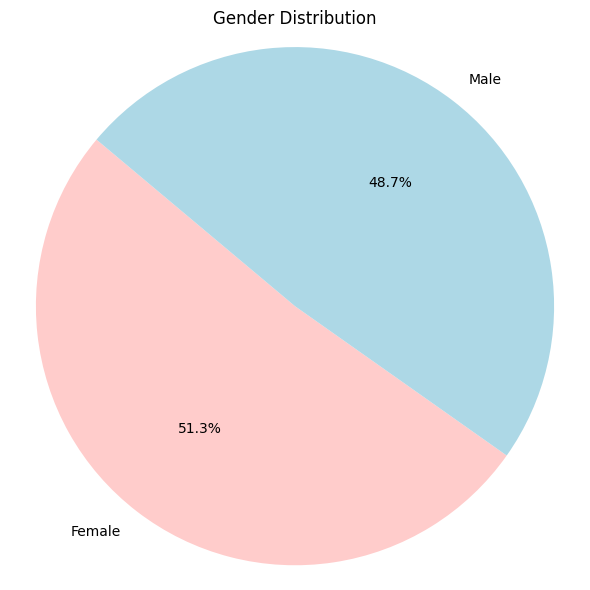

In [74]:
#I alos use the Pie Chart to show the gender distribution
gender_counts = data['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ffcccb', '#add8e6']  # light pink and light blue for fun
)
plt.title("Gender Distribution")
plt.axis('equal')  # Ensures the pie is a perfect circle
plt.tight_layout()
plt.savefig('images/pie_gender.png', dpi=300)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [75]:
#DataFrame for Bar Coupons

bar_data = data[data['coupon'] == 'Bar']

In [76]:
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [77]:
print(f"Number of bar coupon entries: {len(bar_data)}")


Number of bar coupon entries: 2017


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [78]:
#In order to do the comparison, I need to create the group labels first
bar_data.loc[:, 'bar_freq_group'] = bar_data['Bar'].apply(
    lambda x: '≤3' if x in ['Never', 'less than once', '1~3'] else '>3'
)


#and then compute mean of the Y
bar_data.groupby('bar_freq_group')['Y'].mean()


/tmp/ipykernel_11903/1424513325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data.loc[:, 'bar_freq_group'] = bar_data['Bar'].apply(


bar_freq_group
>3    0.351470
≤3    0.633971
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [79]:
# i have to define the bar frequency and age thresholds first
bar_more_than_once = ['1~3', '4~8', 'gt8']
age_over_25 = ['26-30', '31-35', '36-40', '41-45', '46-50', '50plus']

# Then I have to create a Boolean mask for Group A
group_a_mask = (bar_data['Bar'].isin(bar_more_than_once)) & (bar_data['age'].isin(age_over_25))

# Group A: Drivers who go to bars > once/month AND are over 25
group_a = bar_data[group_a_mask]

# Group B: Everyone else
group_b = bar_data[~group_a_mask]

# Compute acceptance rates
group_a_rate = group_a['Y'].mean()
group_b_rate = group_b['Y'].mean()

print(f"Acceptance Rate (Bar > once/month and Age > 25): {group_a_rate:.2%}")
print(f"Acceptance Rate (All Others): {group_b_rate:.2%}")


Acceptance Rate (Bar > once/month and Age > 25): 67.16%
Acceptance Rate (All Others): 40.10%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [80]:
# Define relevant filters
bar_more_than_once = ['1~3', '4~8', 'gt8']
non_kid_passenger = bar_data['passanger'] != 'Kid(s)'
non_farm_occupation = bar_data['occupation'] != 'Farming & Fishing & Forestry'

# Create Group A mask
group_a_mask = (bar_data['Bar'].isin(bar_more_than_once)) & non_kid_passenger & non_farm_occupation

# Apply filters
group_a = bar_data[group_a_mask]
group_b = bar_data[~group_a_mask]

# Calculate acceptance rates
group_a_rate = group_a['Y'].mean()
group_b_rate = group_b['Y'].mean()

print(f"Acceptance Rate (Goes to bar > once/month, passenger not a kid, not in farming/fishing/forestry): {group_a_rate:.2%}")
print(f"Acceptance Rate (All Others): {group_b_rate:.2%}")


Acceptance Rate (Goes to bar > once/month, passenger not a kid, not in farming/fishing/forestry): 71.32%
Acceptance Rate (All Others): 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [81]:
# Group A conditions 
group_a_mask = (
    ((bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
     (bar_data['passanger'] != 'Kid(s)') &
     (bar_data['maritalStatus'] != 'Widowed'))
    |
    ((bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
     (bar_data['age'].isin(['below21', '21-25', '26-30'])))
    |
    ((bar_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
     (bar_data['income'].isin([
         'Less than $12500', '$12500 - $24999',
         '$25000 - $37499', '$37500 - $49999'
     ])))
)

# Group assignment
group_a = bar_data[group_a_mask]
group_b = bar_data[~group_a_mask]

# Acceptance rates
group_a_rate = group_a['Y'].mean()
group_b_rate = group_b['Y'].mean()

print(f"Acceptance Rate (Group A - meets any condition): {group_a_rate:.2%}")
print(f"Acceptance Rate (Group B - all others): {group_b_rate:.2%}")


Acceptance Rate (Group A - meets any condition): 58.81%
Acceptance Rate (Group B - all others): 29.96%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [82]:
#I think the drivers who are young, sociable, and price-sensitive are more likely to accept bar coupons. The drivers who accept these coupons are usually not driving with kids.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [83]:
#Coffee House Coupons
coffee_data = data[data['coupon'] == 'Coffee House'].copy()
# Group by passenger and calculate mean acceptance (Y)
acceptance_by_passenger = coffee_data.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(acceptance_by_passenger)


passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64


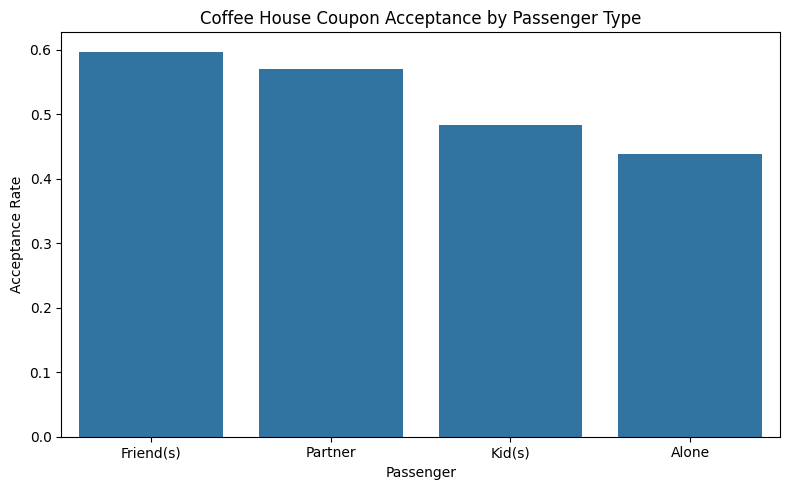

In [84]:
#Visualization using bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_by_passenger.index, y=acceptance_by_passenger.values)
plt.title("Coffee House Coupon Acceptance by Passenger Type")
plt.xlabel("Passenger")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig('images/barplt_coffeehouse_passengers.png', dpi=300)
plt.show()

In [85]:
data = pd.read_csv('data/coupons.csv')  

In [86]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [87]:
#Restaurants less than 20 coupons
RestaurantLessThan20_data = data[data['coupon'] == 'Restaurant(<20)'].copy()
# Group by passenger and calculate mean acceptance (Y)
acceptance_by_passenger = RestaurantLessThan20_data.groupby('passanger')['Y'].mean().sort_values(ascending=False)

#Display results
 
print("Acceptance Rate by Passanger Type for Restaurant(<20) Coupons:")
print(acceptance_by_passenger)
print(f"\nTotal Restaurant(<20) coupons: {len(RestaurantLessThan20_data)}")

Acceptance Rate by Passanger Type for Restaurant(<20) Coupons:
passanger
Friend(s)    0.801453
Partner      0.771318
Kid(s)       0.722846
Alone        0.638328
Name: Y, dtype: float64

Total Restaurant(<20) coupons: 2786


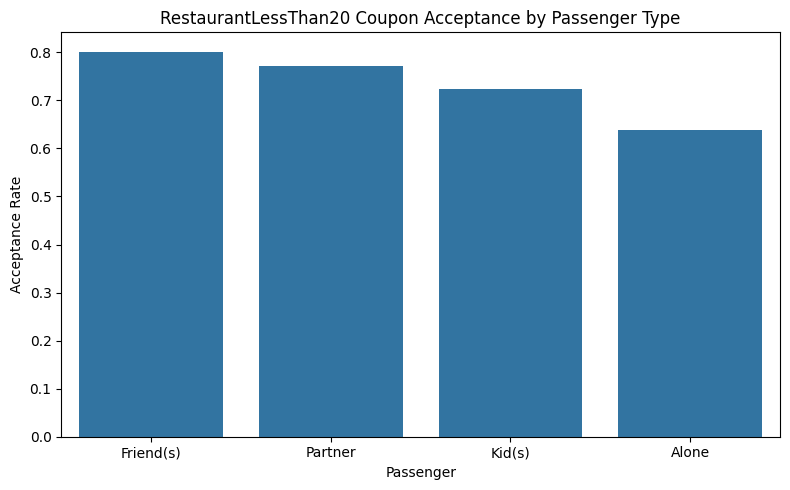

In [88]:
#Visualization using bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_by_passenger.index, y=acceptance_by_passenger.values)
plt.title("RestaurantLessThan20 Coupon Acceptance by Passenger Type")
plt.xlabel("Passenger")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig('images/barplt_restauran20_passengers.png', dpi=300)
plt.show()

In [89]:
#Restaurant20To50 coupons
Restaurant20To50_data = data[data['coupon'] == 'Restaurant(20-50)'].copy()
# Group by passenger and calculate mean acceptance (Y)
acceptance_by_passanger = Restaurant20To50_data.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(acceptance_by_passanger)



passanger
Partner      0.631206
Friend(s)    0.464286
Alone        0.422200
Kid(s)       0.373563
Name: Y, dtype: float64


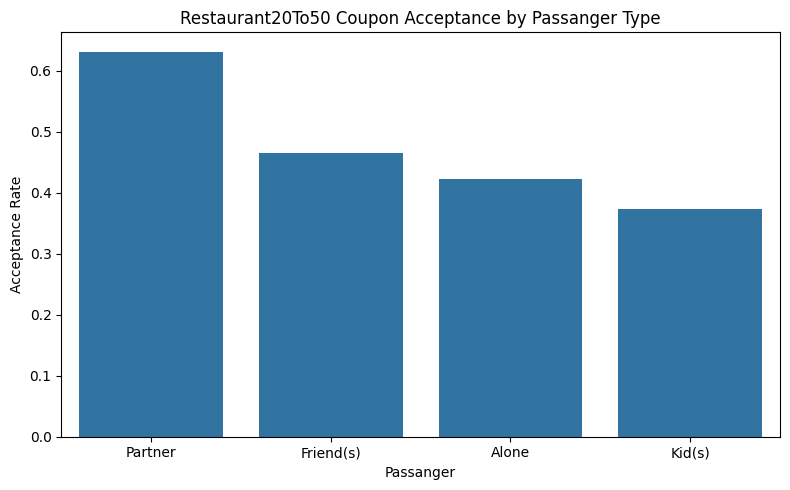

In [90]:
#Visualization using bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_by_passanger.index, y=acceptance_by_passanger.values)
plt.title("Restaurant20To50 Coupon Acceptance by Passanger Type")
plt.xlabel("Passanger")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig('images/barplt_Restaurant20To50_passangers.png', dpi=300)
plt.show()

In [91]:
#CarryAway coupons
data.info()
#print(data)

print("unique coupon values: ", data['coupon'].unique())
CarryAway = data[data['coupon'] == 'CarryAway'].copy()
#print(CarryAway)
CarryAway = data[data['coupon'] == 'CarryAway'].copy()
# Group by passenger and calculate mean acceptance (Y)
acceptance_by_passenger = CarryAway.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(acceptance_by_passenger)


#print(data['coupon'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

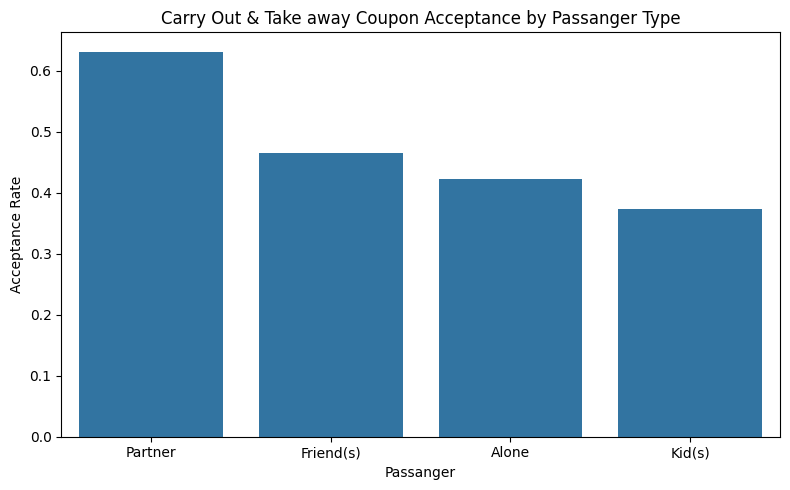

In [92]:
#Visualization using bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_by_passanger.index, y=acceptance_by_passanger.values)
plt.title("Carry Out & Take away Coupon Acceptance by Passanger Type")
plt.xlabel("Passanger")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig('images/barplt_CarryAway_passangers.png', dpi=300)
plt.show()